# DriX med deployments

In [1]:
import os
from glob import glob

from datetime import datetime
from time import sleep

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import pyproj

import taos.utils as ut
import insitu as ins
from taos.insitu import rad2deg, knot

In [4]:
43 + 53.2 / 60, 5 + 16.7 / 60

(43.88666666666667, 5.278333333333333)

---

## useful metrics

In [2]:
lonc = 5
latc = 43

In [3]:
ins.metrics_cheatsheet(lonc, latc)

 lon: 1 deg = 81.54km,  0.1 deg = 8.2km,  0.01 deg = 815.4m,  0.001 deg = 81.5m
 lon: 1 deg = 81.54km,  1 min = 1359.0m,  .1 min = 135.9m,  0.01 min = 13.6m
 lon: 1 deg = 81.54km,  1 sec = 22.7m,  .1 sec = 2.3m
-----------------------------------------------------------------
 lat: 1 deg = 111.10km,  0.1 deg = 11.1km,  0.01 deg = 1110.9m,  0.001 deg = 111.1m
 lat: 1 deg = 111.10km,  1 min = 1851.5m,  .1 min = 185.2m,  0.01 min = 18.5m
 lat: 1 deg = 111.10km,  1 sec = 30.9m,  .1 sec = 3.1m


🐷🐷🐷🐷🐨🌼🌼🌼💐💐🌾🌖🌾😋😋👩‍🦳👩‍🦳§😄😁😁😁😀😄😄(😃😄(😚😚😗)🙃😇😇😇😇🥳🥳😏🥳🥳😏🥳😏🥳)😡😡😡😡😡😡👹👹👹👺👺👺👾👽👾😿😿😿😸😹👍🖐🏻👉🏽👀👥👥👥👥👥👥👥🧑🏽‍🦰🧑🏽‍🦰👱‍♂️👱‍♂️👱‍♂️👱‍♂️😡🤕à🤕🤕🤒😷

---

## drifter deployment route

In [4]:
delta_X = 3e3
delta_Y = 1e3

U = -0.3 + 1j * 0.3

# theta = 0/rad2deg # tmp !!
# theta = -45*rad2deg # tmp !! , degrees
# theta = 2.36
theta = np.angle(U)

# lon_a, lat_a = lonc, latc # tmp !!
lon_a, lat_a = 5.2475, 43.075

# other variables
speed = 4  # knots
time_waiting = 5 * 60  # seconds

In [13]:
X = np.array(
    [
        0 + 0 * 1j,
        delta_X * 0.5 + 0 * 1j,
        delta_X + 0 * 1j,
        delta_X + delta_Y * 1j,
        delta_X * 0.5 + delta_Y * 1j,
        0 + delta_Y * 1j,
    ]
)
# X = X - X.mean()
X = X - X[0]
X = X * np.exp(1j * (theta + np.pi / 2))

x_a, y_a = ins.ll2xy(lon_a, lat_a)
x, y = x_a + X.real, y_a + X.imag
lon, lat = ins.xy2ll(x, y)

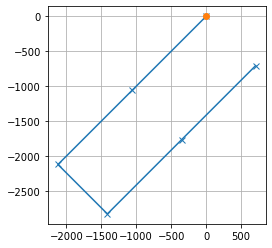

In [14]:
fig, ax = plt.subplots(1, 1)
ax.plot(X.real, X.imag, "x-")
ax.plot(X[0].real, X[0].imag, "o")  # start
ax.set_aspect("equal")
ax.grid()

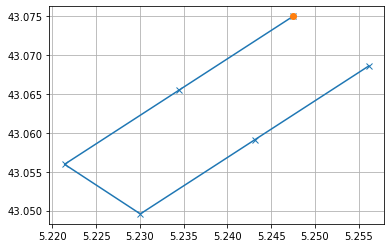

In [15]:
fig, ax = plt.subplots(1, 1)
ax.plot(lon, lat, "x-")
ax.plot(lon[0], lat[0], "o")  # start
# ax.set_aspect("equal")
ax.grid()

In [16]:
dash = ins.dashboard_route(
    lon,
    lat,
    ship_speed=speed,
    time_waiting=time_waiting / 60,
)
dash.grid

Output()

{'ship': {'lon': 5.2475, 'lat': 43.075}, 'anchor': {'lon': 5.2475, 'lat': 43.075}}


/Users/aponte/.miniconda3/envs/cognac/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


GridspecLayout(children=(Button(description='Update', icon='check', layout=Layout(grid_area='widget001'), styl…

In [29]:
0.696013 * 60

41.76078

In [26]:
dash.df

,time,lon,lat,heading,dt_route,dt_total,lon_deg,lon_min,lat_deg,lat_min
deployment,,,,,,,,,,
-1,2022-09-23 05:24:22.919612000,5.247500,43.075000,NaN,NaN,NaN,5.0,14.850000,43.0,4.500000
0,2022-09-23 05:29:23.919612000,5.247476,43.075006,-3.455752,0.016667,5.016667,5.0,14.848561,43.0,4.500346
1,2022-09-23 05:47:05.680421434,5.230516,43.068361,-2.647937,12.696013,17.696013,5.0,13.830983,43.0,4.101656
2,2022-09-23 06:04:47.441230666,5.213560,43.061714,-2.647937,12.696013,17.696013,5.0,12.813626,43.0,3.702814
3,2022-09-23 06:15:39.307304335,5.219824,43.057097,-0.785398,5.864435,10.864435,5.0,13.189425,43.0,3.425825
4,2022-09-23 06:33:21.068111604,5.228980,43.069494,1.077141,12.696013,17.696013,5.0,13.738780,43.0,4.169627
5,2022-09-23 06:51:02.828918947,5.238139,43.081890,1.077141,12.696013,17.696013,5.0,14.288357,43.0,4.913383


In [23]:
5.2475, 43.075

14.85 / 60, 4.5 / 60,

(0.2475, 0.075)

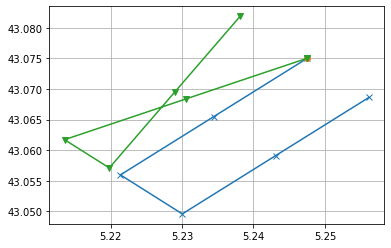

In [24]:
fig, ax = plt.subplots(1, 1)
ax.plot(lon, lat, "x-")
ax.plot(lon[0], lat[0], "o")  # start

# ax.plot(dash.lon_vertices, dash.lat_vertices, "v-")
ax.plot(dash.df.lon, dash.df.lat, "v-")

# ax.set_aspect("equal")
ax.grid()

### Extract current speed and direction from dashboard

In [17]:
U = dash.w["current_speed_x"].value + 1j * dash.w["current_speed_y"].value

# U = 1. + 1j*1. # dev
U_theta = np.angle(U)
U_amplitude = np.abs(U)
print(
    f" theta={U_theta:.2f} rad = {U_theta*rad2deg:.2f} deg, abs(U) = {U_amplitude:.2f} m/s"
)

 theta=2.36 rad = 135.00 deg, abs(U) = 0.14 m/s


In [8]:
# set rotation angle to current direction
theta = U_theta

⛷⛷⛷⛷⛹️‍♂️🛹🥌🥶🥶🎽
😀😀😔😔🥳🥳🥳🥳
🤩😞
😨🥵🤬⚽️🏀🏈⚾️🥎🎾🎾🏐🥏
